In [1]:
#| code-fold: true
#| echo: false
from tools import tools
to = tools()
from IPython.display import Markdown, Latex
from sympy.physics.vector import vprint, dynamicsymbols, vlatex
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Messung der Zeit, Frequenz und Periode
## Warum die Frequenz messen
Es gibt primäre Gründe die Frequenz zu messen wie zum Beipiel in der Frequenztechnik. Dort will man sicherstellen, dass die geqünschte Frequenz auch tatsächlich eingestellt ist. So soll ein WLAN Signal im $2,4 \ \mathrm{GHz}$ Bereich auf Kanal 1 zwischen $2399,5 \ \mathrm{MHz}$ und $2424,5 \ \mathrm{MHz}$ funken. Dies muss Messtechnisch sicherhgestellt werden.  
Da sich Frequenzen aber hervorragend digitalisieren lassen sind Frequenzen auch sehr beliebt als Messignale anderer physikalischer Größen. Zum Beispiel lässt sich die Geschwindigkeit als Frequenz übertragen, wenn bekannt ist, dass jede Periode einem definierten Weg entspicht. $$ Geschwindigkeit =  \frac{Weg \ pro \ Periode }{Periodendauer} = Weg \ pro \ Periode \cdot Frequenz$$  
Noch einfacher ist es die Durchflussmenge mittels Frequenz zu übertragen. Dazu muss aus dem Datenblatt gelesen werden wie viel Volumen einer Periode entspricht. $$ Durchlussmenge = Anzahl \ der Perioden \ \cdot Volumen \ pro \ Periode $$

## Periodische Signale
Bevor mit der eigentlichen Messung begonnen wird soll hier noch einmal auf die Grundlagen eingegangen werden. Man spricht von einem periodischen Signal wenn es sich nach einer bestimmten Zeitdauer, der Periodendauer, wiederholt. Ein Sinussignal ist ein Beispiel dafür.

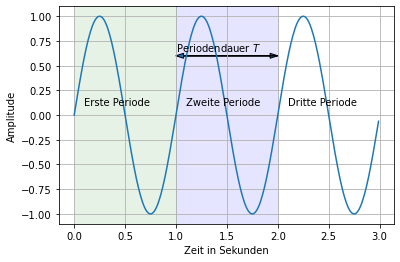

In [2]:
#| code-fold: true
#| label: fig-sinus
#| fig-cap: "Sinussignal mit drei Perioden"

fig, ax = plt.subplots()

t = np.arange(0, 3, 0.01)

y = np.sin(2*np.pi*1*t)

ax.plot(t, y)
ax.grid(True)
ax.set_xlabel('Zeit in Sekunden')
ax.set_ylabel('Amplitude')

#ax.set_title("Sinussignal", size=15)
 
# highlight a time range
ax.axvspan(1, 2, color="blue", alpha=0.1)
ax.text(0.1,0.1,'Erste Periode')

ax.axvspan(0, 1, color="green", alpha=0.1)
ax.text(1.1,0.1,'Zweite Periode')

ax.text(2.1,0.1,'Dritte Periode')

#ax.annotate("This is an annotation", xy=(1, 0.6), xytext=(2, 0.6), arrowprops={"arrowstyle":"<->", "color":"gray"})
ax.arrow(1,0.6,1,0,length_includes_head=True,head_width=0.05)
ax.arrow(2,0.6,-1,0,length_includes_head=True,head_width=0.05)
ax.text(1,0.65,'Periodendauer $T$')


plt.show()

 Die Einheit der Frequenz ist das Herz $f$. In SI-Baisiseinheiten ausgedrückt ist es der Kehrwert der Zeit $\mathrm{Hz =1/s}$. Der Zusammenhang zwischen der Periodendauer und der Frequenz lässt sich bereits aus der Einheit der Frequenz ablesen. Es ist wiederum der Kehrwert $f = 1/T$.

## Messung
Sowohl die Periodendauer als auch die Frequenz können mit einem ähnlichen Messaufbau gemessen werden. 

![Blockschaltbild der Frequenzmessung](images/BlockFrequenzmessung.png){#fig-BlockFreq}

Mit der Information des Zählers und der Frequenz des Taktes kann nun die Frequenz des Signales berechnet werden.

### Frequenzmessung
Die Messung benötigt einen Zähler und einen Takt mit bekannter Periodendauer. Wenn die Anzahl der Perioden in einer bestimmten Zeit gezählt werden, kann daraus die Frequenz und die Periodendauer berechent werden. 
Die dargestellte Quelle ist symbolisch für das zu messende Signal. Vorraussetzung ist, dass es sich um ein periodisches Signal handelt. Es muss kein Sinussignal sein. Es kann zum Beispiel auch ein Rechteck- oder Sägezahnsignal sein. Sollange das Signal periodisch ist funktioniert die Messung.

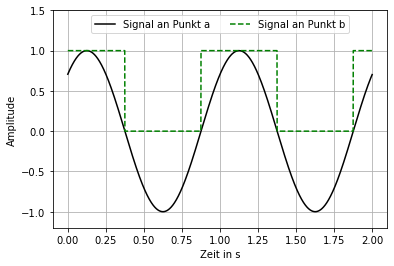

In [3]:
#| code-fold: true
#| label: fig-komparator
#| fig-cap: "Eingangssignal"

fN = 1 #Frequenz in Hz
nN = 2 #Anzahl der Perioden
AN = 1 #Amplitude
phiN = np.pi/4#Phasenverschiebung in radiant
TN = 1/fN #Periodendauer
omega = 2*np.pi*fN #Kreisfrequenz

#Zeit array
tN = np.arange(0,nN*TN,TN/1000)

yN = np.sin(omega*tN+phiN)

plt.plot(tN,yN,'-k',label='Signal an Punkt a')
plt.plot(tN, 0.5+1/2*signal.square(2 * np.pi * fN * tN+phiN),'--g',label='Signal an Punkt b')
#plt.plot(tN, 1*signal.square(2 * np.pi * fN*3 * tN+phiN),'-b',label='Signal an Punkt c')        
plt.grid()
plt.ylim(-1.2, 1.5)
plt.xlabel(r'Zeit in s')
plt.ylabel(r'Amplitude')
plt.legend(loc=9,ncol=2)
plt.show()

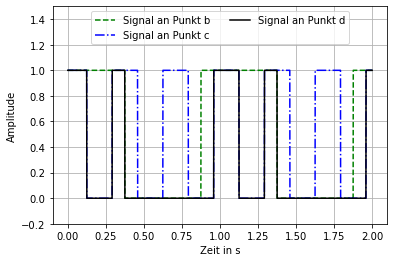

In [4]:
#| code-fold: true
#| label: fig-rechtAND
#| fig-cap: "Taktsignal und logische Verknüpfung"

fN = 1 #Frequenz in Hz
nN = 2 #Anzahl der Perioden
AN = 1 #Amplitude
phiN = np.pi/4#Phasenverschiebung in radiant
TN = 1/fN #Periodendauer
omega = 2*np.pi*fN #Kreisfrequenz

#Zeit array
tN = np.arange(0,nN*TN,TN/1000)

yN = np.sin(omega*tN+phiN)

sig_b = 0.5+1/2*signal.square(2 * np.pi * fN * tN+phiN)
sig_c = 0.5+1/2*signal.square(2 * np.pi * fN*3 * tN+phiN)

plt.plot(tN, sig_b,'--g',label='Signal an Punkt b')
plt.plot(tN, sig_c,'-.b',label='Signal an Punkt c')
plt.plot(tN, sig_b*sig_c,'-k',label='Signal an Punkt d')
plt.grid()
plt.ylim(-.2, 1.5)
plt.xlabel(r'Zeit in s')
plt.ylabel(r'Amplitude')
plt.legend(loc=9,ncol=2)
plt.show()